In [2]:
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import nltk


In [3]:
real=pd.read_csv('/home/joseph/Downloads/nlp/archive (4)/True.csv')
fake=pd.read_csv('/home/joseph/Downloads/nlp/archive (4)/Fake.csv')

In [4]:
fake['target']=0

In [5]:
fake

,title,text,subject,date,Unnamed: 4,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",NaN,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",NaN,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",NaN,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",NaN,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",NaN,0
...,...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",NaN,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",NaN,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",NaN,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",NaN,0


In [6]:
fake=fake.drop(['Unnamed: 4'],axis=1)

In [7]:
real['target']=1

In [8]:
real

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [9]:
data=pd.concat([fake,real])

In [10]:
data

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [11]:
data.shape

(44898, 5)

In [12]:
data.describe()

,target
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [13]:
data.dtypes

title      object
text       object
subject    object
date       object
target      int64
dtype: object

In [14]:
#checking for duplicates in title
duplicate=data[data['title'].duplicated(keep=False)].sort_values('title')

In [17]:
duplicate

,title,text,subject,date,target
1488,McConnell Says He’ll Obstruct ANY Effort To H...,Siding with Trump s Attorney General Jeff Sess...,News,"May 12, 2017",0
1535,McConnell Says He’ll Obstruct ANY Effort To H...,Siding with Trump s Attorney General Jeff Sess...,News,"May 10, 2017",0
20771,#AnyoneButHillary: NEW POLL Shows Bernie Suppo...,Hillary may find out she needs more than black...,left-news,"Apr 6, 2016",0
14160,#AnyoneButHillary: NEW POLL Shows Bernie Suppo...,Hillary may find out she needs more than black...,politics,"Apr 6, 2016",0
9841,#Austin: Fights Break Out Between Police and S...,Commies carrying flags fought with the Austin ...,politics,"Sep 23, 2017",0
...,...,...,...,...,...
16247,“Would You Rather Do A Job You Hate And Not Pa...,"Filmmaker and patriot, Dennis Michael Lynch is...",Government News,"Feb 12, 2017",0
16696,“YOU’RE HIRED!” Trump Pulls Unemployed Vet Fro...,"No matter which candidate you support, this mo...",Government News,"Mar 21, 2016",0
14235,“YOU’RE HIRED!” Trump Pulls Unemployed Vet Fro...,"No matter which candidate you support, this mo...",politics,"Mar 21, 2016",0
21428,“You’re Not Welcome!” Obama As Welcome At Rose...,Roseberg residents and families of victims are...,left-news,"Oct 7, 2015",0


In [18]:
duplicate.shape[0]

11798

In [19]:
duplicate.count()

title      11798
text       11798
subject    11798
date       11798
target     11798
dtype: int64

In [20]:
data = data.drop_duplicates('title')

In [21]:
data.shape

(38729, 5)

In [22]:
data.isna().sum()#there is no missing values

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38729 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    38729 non-null  object
 1   text     38729 non-null  object
 2   subject  38729 non-null  object
 3   date     38729 non-null  object
 4   target   38729 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [24]:
data['subject'].values

array(['News', 'News', 'News', ..., 'worldnews', 'worldnews', 'worldnews'],
      dtype=object)

In [25]:
data['subject'].value_counts()


politicsNews                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

Text(0.5, 1.0, 'Data distribution of fake and real data')

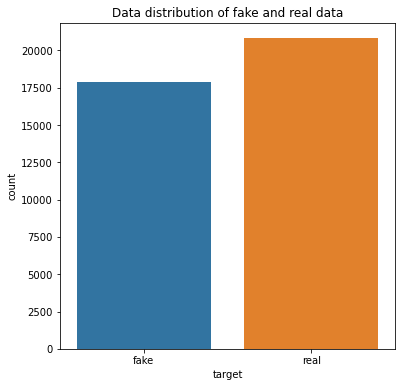

In [27]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x="target", data=data)

ax.set(xticklabels=['fake', 'real'])

plt.title("Data distribution of fake and real data")


In [29]:
data['target'].value_counts()

1    20826
0    17903
Name: target, dtype: int64

In [30]:
data=data.drop(['title','subject','date'],axis=1)

In [31]:
data

,text,target
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21411,UNITED NATIONS (Reuters) - Two North Korean sh...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [32]:
news=data.text

In [33]:
news

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
21411    UNITED NATIONS (Reuters) - Two North Korean sh...
21413    LONDON (Reuters) - LexisNexis, a provider of l...
21414    MINSK (Reuters) - In the shadow of disused Sov...
21415    MOSCOW (Reuters) - Vatican Secretary of State ...
21416    JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
Name: text, Length: 38729, dtype: object

# TOKENIZATION

In [34]:
#tokenizing the data and then joining it back together 
from nltk import TweetTokenizer
tk = TweetTokenizer()
news = news.apply(lambda x: tk.tokenize(x)).apply(lambda x: ' '.join(x))

# REMOVING PUNCTUATIONS

In [35]:
#Replacing symbols and punctuations from tweets
news = news.str.replace('[^a-zA-Z0-9]+', ' ')


# REMOVING SHORT WORDS

In [40]:
from nltk.tokenize import word_tokenize
#Removing small words from the news (words which has length <= 3)
news = news.apply(lambda x: ' '.join([w for w in word_tokenize(x) if len(w) >= 3]))

In [41]:
news

0        Donald Trump just couldn wish all Americans Ha...
1        House Intelligence Committee Chairman Devin Nu...
2        Friday was revealed that former Milwaukee Sher...
3        Christmas day Donald Trump announced that woul...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
21411    UNITED NATIONS Reuters Two North Korean shipme...
21413    LONDON Reuters LexisNexis provider legal regul...
21414    MINSK Reuters the shadow disused Soviet era fa...
21415    MOSCOW Reuters Vatican Secretary State Cardina...
21416    JAKARTA Reuters Indonesia will buy Sukhoi figh...
Name: text, Length: 38729, dtype: object

# STEMMING

In [36]:
#Stemming the news
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer('english')
news = news.apply(lambda x: [stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x: ' '.join(x))

# REMOVING STOP WORDS

In [43]:
#Removing stopwords from the news
from nltk.corpus import stopwords 
stop = stopwords.words('english')
news = news.apply(lambda x: [i for i in word_tokenize(x) if i not in stop]).apply(lambda x: ' '.join(x))

# TFIDF VECTORIZATION

In [44]:
#Vectorizing the news using TFIDFVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(stop_words = stop)
data_vector = vector.fit_transform(news)

In [45]:
#Replacing text columns from the merged data with processed news data
data.text = news


In [46]:
data

,text,target
0,donald trump wish american happi new year leav...,0
1,hous intellig committe chairman devin nune go ...,0
2,friday reveal former milwauke sheriff david cl...,0
3,christma day donald trump announc would back w...,0
4,pope franci use annual christma day messag reb...,0
...,...,...
21411,unit nation reuter two north korean shipment s...,1
21413,london reuter lexisnexi provid legal regulator...,1
21414,minsk reuter shadow disus soviet era factori m...,1
21415,moscow reuter vatican secretari state cardin p...,1


In [47]:
#Seperating label y from the train_data
y= data.target
y=y.values



In [48]:
#Value counts of 0 and 1 to check the imbalance of the data
pd.Series(y).value_counts()

1    20826
0    17903
dtype: int64

In [49]:
#Splitting the train data into X_train, y_train (train_set), X_test, y_test (test_set)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_vector, y, test_size = 0.3, stratify = y,random_state=42)

# LOGISTIC REGRESSION

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
classifier=LogisticRegression() #creating a Logistic Regression object
classifier.fit(X_train,y_train) #command for training / fitting the model

LogisticRegression()

In [102]:
#hyper parameters
from sklearn.model_selection import GridSearchCV #this is used for hyper parameter tuning

solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty_values = ['l1', 'l2', 'elasticnet', 'none']
parameters = {'solver':solver_values , 'penalty': penalty_values }

In [103]:
linear_classifier = GridSearchCV(classifier, parameters)
linear_classifier.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [104]:
linear_classifier.best_estimator_

LogisticRegression(penalty='l1', solver='liblinear')

In [105]:
linear_classifier.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [106]:
linear_classifier_final = LogisticRegression(penalty = 'l1',solver='liblinear')
linear_classifier_final.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [108]:
y_pred_logistic=linear_classifier_final.predict(X_test)

In [109]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_logistic)

0.9925122643945262

## RANDOM FOREST CLASSIFIER

In [42]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
y_pred_random = model2.predict(X_test)

In [44]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_random)

0.9913882702301411

In [45]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_random)

0.9909727626459144

# XGB CLASSIFIER

In [61]:
#XGBClassifier
from xgboost import XGBClassifier 
model3 = XGBClassifier()
model3.fit(X_train, y_train)
y_pred_XGB= model3.predict(X_test)

In [47]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_XGB)

0.9980697847067558

In [48]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_XGB)

0.997977598008712

# SUPPORT VECTOR MACHINE

In [49]:
from sklearn.svm import SVC  
model4= SVC()
model4.fit(X_train, y_train)
y_pred_svm = model4.predict(X_test)

In [50]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svm)

0.9920564216778025

# KNN Classification

In [51]:
from sklearn.neighbors import KNeighborsClassifier
n_classifier = KNeighborsClassifier(n_neighbors=5)

In [52]:
n_classifier.fit(X_train,y_train)
y_pred_KNN=n_classifier.predict(X_test)

In [53]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_KNN)

0.7256124721603563

# Ridge classifier

In [53]:
#Ridge CLassifier
from sklearn.linear_model import RidgeClassifier

from sklearn.model_selection import GridSearchCV
ridge = RidgeClassifier()

In [55]:
parameters = {'alpha': [ 1, 5, 10, 20,100]}
ridge_classifier = GridSearchCV(ridge, parameters)
ridge_classifier.fit(X_train, y_train)

GridSearchCV(estimator=RidgeClassifier(),
             param_grid={'alpha': [1, 5, 10, 20, 100]})

In [56]:
ridge_classifier.best_params_

{'alpha': 1}

In [57]:
ridge_classifier = RidgeClassifier(alpha=1)

ridge_classifier.fit(X_train,y_train)

RidgeClassifier(alpha=1)

In [58]:
y_pred_ridge=ridge_classifier.predict(X_test)

In [60]:
#accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_ridge)

0.9882089680695413

# Save the Model

In [67]:
import joblib


In [69]:
joblib.dump(model3, '/home/joseph/Documents/xgb.pkl')

['/home/joseph/Documents/xgb.pkl']

In [70]:
model1=joblib.load('/home/joseph/Documents/xgb.pkl')

In [ ]:
#END